In [20]:
import mysql.connector
import pandas as pd

# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",      
    user="root",   
    password="1234",
    database="music" 
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

#create cursor object to execute sql queries
cursor = connection.cursor()
# Query the data from dataset
cursor.execute("SELECT * FROM dataset")
#After fetching data from the database we are storing it into Pandas DataFrame
dataset = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(dataset.head(5))

Connected to MySQL!
   Year Month      Platform         Region    Genre Song Type  \
0  2020    10       Spotify         Europe      Pop        EP   
1  2024    12  Amazon Music           Asia     Rock     Album   
2  2019    07   Apple Music  South America  Hip-Hop        EP   
3  2020    02       Spotify         Africa     Rock    Single   
4  2023    03       YouTube         Africa  Hip-Hop     Album   

   Age Group (18-24)  Age Group (25-34)  Age Group (35-44)  Age Group (45-54)  \
0               2272               3379               2546               1346   
1               1599               3016               1576               1929   
2               1840               3847               2872               2055   
3               2699               3322               1923               1994   
4               2333               3273               1705               2584   

   ...  Monthly Streams  Revenue (USD)  ARPU (USD) Paid Subscribers (%)  \
0  ...           107360    

In [3]:
dataset.describe 

<bound method NDFrame.describe of      Year Month      Platform         Region    Genre Song Type  \
0    2020    10       Spotify         Europe      Pop        EP   
1    2024    12  Amazon Music           Asia     Rock     Album   
2    2019    07   Apple Music  South America  Hip-Hop        EP   
3    2020    02       Spotify         Africa     Rock    Single   
4    2023    03       YouTube         Africa  Hip-Hop     Album   
..    ...   ...           ...            ...      ...       ...   
995  2020    11  Amazon Music         Europe  Hip-Hop     Album   
996  2024    09   Apple Music          India  Hip-Hop    Single   
997  2023    05  Amazon Music  South America  Hip-Hop        EP   
998  2019    10       Spotify          Japan  Hip-Hop        EP   
999  2024    09       Spotify  North America     Jazz        EP   

     Age Group (18-24)  Age Group (25-34)  Age Group (35-44)  \
0                 2272               3379               2546   
1                 1599           

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1000 non-null   int64  
 1   Month                       1000 non-null   object 
 2   Platform                    1000 non-null   object 
 3   Region                      1000 non-null   object 
 4   Genre                       1000 non-null   object 
 5   Song Type                   1000 non-null   object 
 6   Age Group (18-24)           1000 non-null   int64  
 7   Age Group (25-34)           1000 non-null   int64  
 8   Age Group (35-44)           1000 non-null   int64  
 9   Age Group (45-54)           1000 non-null   int64  
 10  Age Group (55+)             1000 non-null   int64  
 11  Male (%)                    1000 non-null   int64  
 12  Female (%)                  1000 non-null   int64  
 13  Device Type                 1000 n

In [5]:
dataset.shape # total number of rows and columns 

(1000, 25)

In [6]:
print(dataset.isnull().sum())  # Count missing values per column

Year                          0
Month                         0
Platform                      0
Region                        0
Genre                         0
Song Type                     0
Age Group (18-24)             0
Age Group (25-34)             0
Age Group (35-44)             0
Age Group (45-54)             0
Age Group (55+)               0
Male (%)                      0
Female (%)                    0
Device Type                   0
Monthly Active Users (MAU)    0
Monthly Streams               0
Revenue (USD)                 0
ARPU (USD)                    0
Paid Subscribers (%)          0
Free Subscribers (%)          0
Likes                         0
Shares                        0
Comments                      0
Peak Streaming Hours (UTC)    0
Churn Rate (%)                0
dtype: int64


In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.dtypes

Year                            int64
Month                          object
Platform                       object
Region                         object
Genre                          object
Song Type                      object
Age Group (18-24)               int64
Age Group (25-34)               int64
Age Group (35-44)               int64
Age Group (45-54)               int64
Age Group (55+)                 int64
Male (%)                        int64
Female (%)                      int64
Device Type                    object
Monthly Active Users (MAU)      int64
Monthly Streams                 int64
Revenue (USD)                   int64
ARPU (USD)                    float64
Paid Subscribers (%)            int64
Free Subscribers (%)            int64
Likes                           int64
Shares                          int64
Comments                        int64
Peak Streaming Hours (UTC)     object
Churn Rate (%)                float64
dtype: object

In [9]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

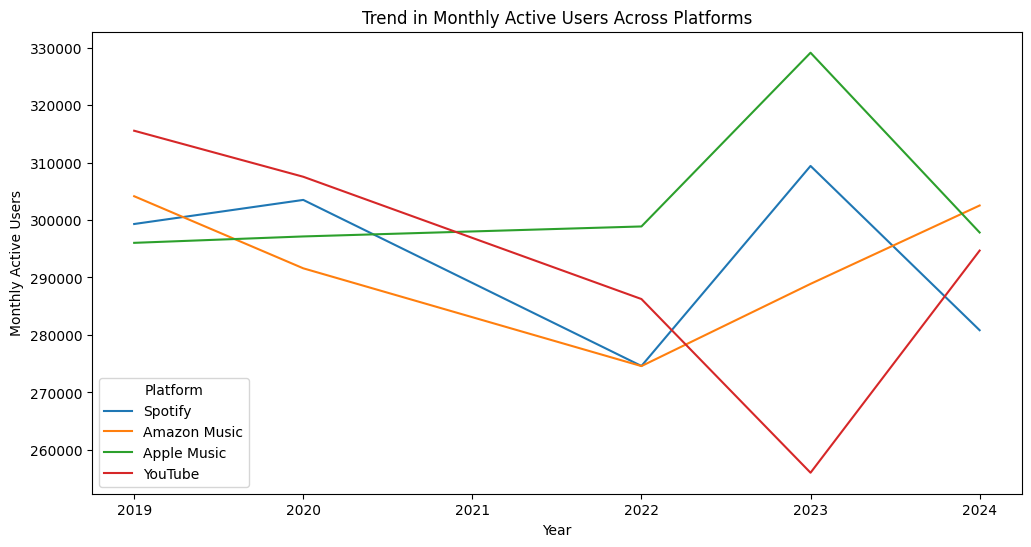

In [10]:
# analyzing the trend in Monthly Active Users Across Platforms
# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Create a line plot showing the trend in Monthly Active Users (MAU) over the years across platforms
sns.lineplot(data=dataset, x="Year", y="Monthly Active Users (MAU)", hue="Platform", errorbar=None)

# Set the title of the plot
plt.title("Trend in Monthly Active Users Across Platforms")

# Label the x-axis
plt.xlabel("Year")

# Label the y-axis
plt.ylabel("Monthly Active Users")

# Add a legend with the title 'Platform' to differentiate the lines by platform
plt.legend(title="Platform")

# Display the plot
plt.show()


<Figure size 1400x700 with 0 Axes>

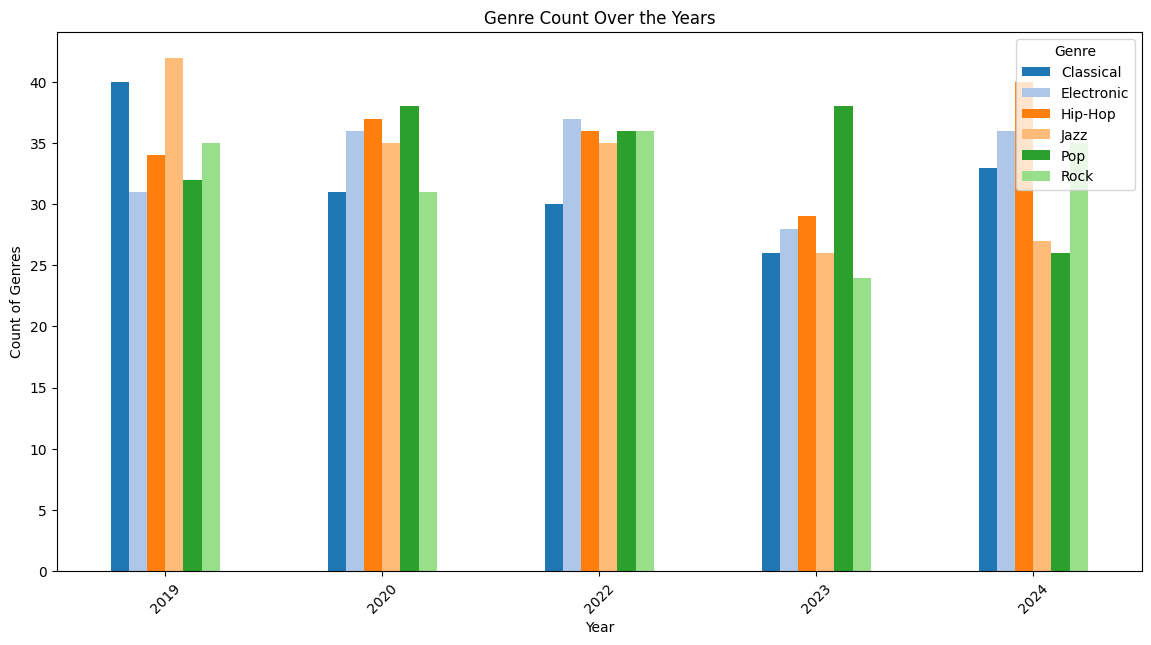

In [11]:
# analyzing the genre with highest engagement over the year
# Group by 'Year' and 'Genre' to get the count of each genre per year
genre_year_counts = dataset.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot the count of genres over the years
plt.figure(figsize=(14, 7))
genre_year_counts.plot(kind='bar', stacked=False, figsize=(14, 7), color=plt.cm.tab20.colors)

# Set title and axis labels
plt.title("Genre Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Count of Genres")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

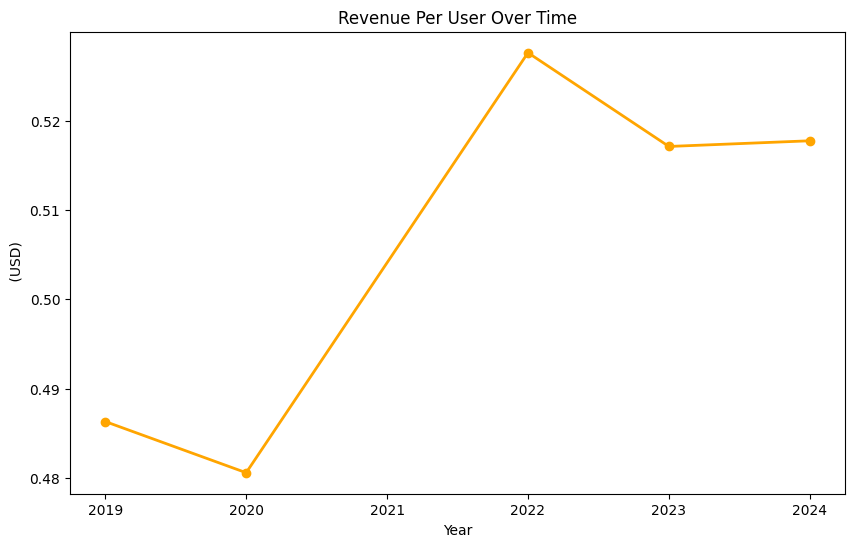

In [12]:
# analyzing the revenue per user over time

dataset['ARPU'] = dataset['Revenue (USD)'] / dataset['Monthly Active Users (MAU)']

# Group by 'Year' and calculate the mean ARPU for each year (or group by Month if desired)
arpu_over_time = dataset.groupby('Year')['ARPU'].mean()

# Plot ARPU over time
plt.figure(figsize=(10, 6))
plt.plot(arpu_over_time.index, arpu_over_time.values, marker='o', color='orange', linestyle='-', linewidth=2)

# Set title and axis labels
plt.title("Revenue Per User Over Time")
plt.xlabel("Year")
plt.ylabel(" (USD)")

# Show the plot
plt.show()


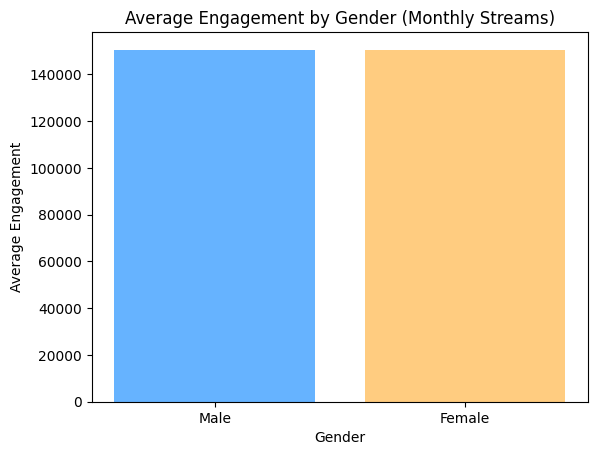

In [13]:
# analyzing average engagement based on gender
male_engagement = dataset["Male (%)"] * dataset["Monthly Streams"] / 100
female_engagement = dataset["Female (%)"] * dataset["Monthly Streams"] / 100

# Calculate the average engagement metrics for both genders
male_avg_engagement = male_engagement.mean()
female_avg_engagement = female_engagement.mean()

# You can also calculate for Likes, Shares, and Comments similarly if needed.

# Plot comparison
gender_avg_engagement = [male_avg_engagement, female_avg_engagement]
labels = ["Male", "Female"]

plt.bar(labels, gender_avg_engagement, color=['#66b3ff', '#FFCC80'])
plt.title("Average Engagement by Gender (Monthly Streams)")
plt.ylabel("Average Engagement")
plt.xlabel("Gender")
plt.show()


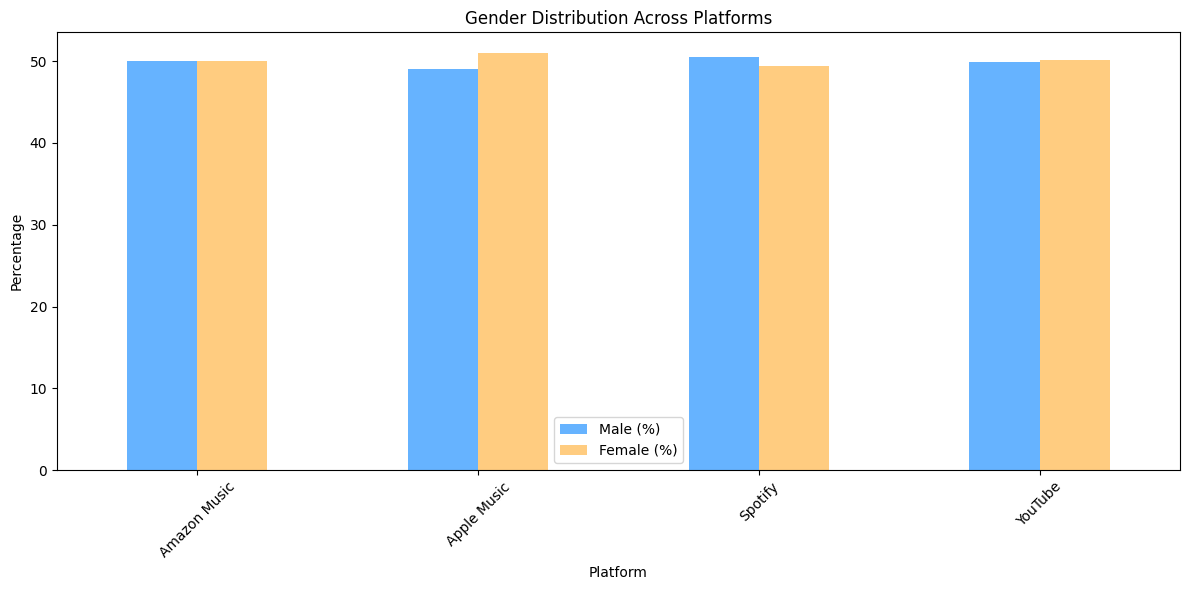

In [14]:
# Gender Distribution Across Platforms
platform_gender = dataset.groupby('Platform')[['Male (%)', 'Female (%)']].mean()

# Plot the gender distribution across platforms
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for Male and Female gender distribution by platform
platform_gender.plot(kind='bar', stacked=False, color=['#66b3ff', '#FFCC80'], ax=ax)

# Set the title and labels
plt.title('Gender Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

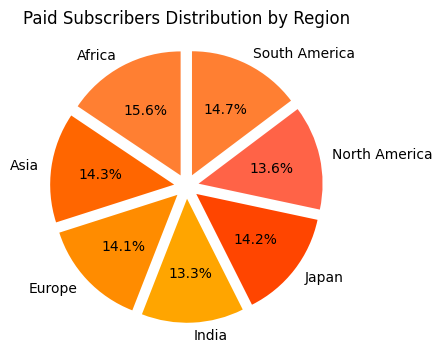

In [23]:
# Analyzing the average Paid Subscribers percentage

# Group by region and calculate the average of Paid Subscribers (%)
region_paid = dataset.groupby("Region")["Paid Subscribers (%)"].mean()

# Custom color palette for the pie chart
colors = ['#FF7F32', '#FF6600', '#FF8C00', '#FFA500', '#FF4500', '#FF6347'] # Example colors

# Plot the pie chart with custom colors
plt.figure(figsize=(4,5))
plt.pie(region_paid, labels=region_paid.index, autopct="%1.1f%%", startangle=90, colors=colors, explode=[0.1]*len(region_paid))
plt.title("Paid Subscribers Distribution by Region")  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()



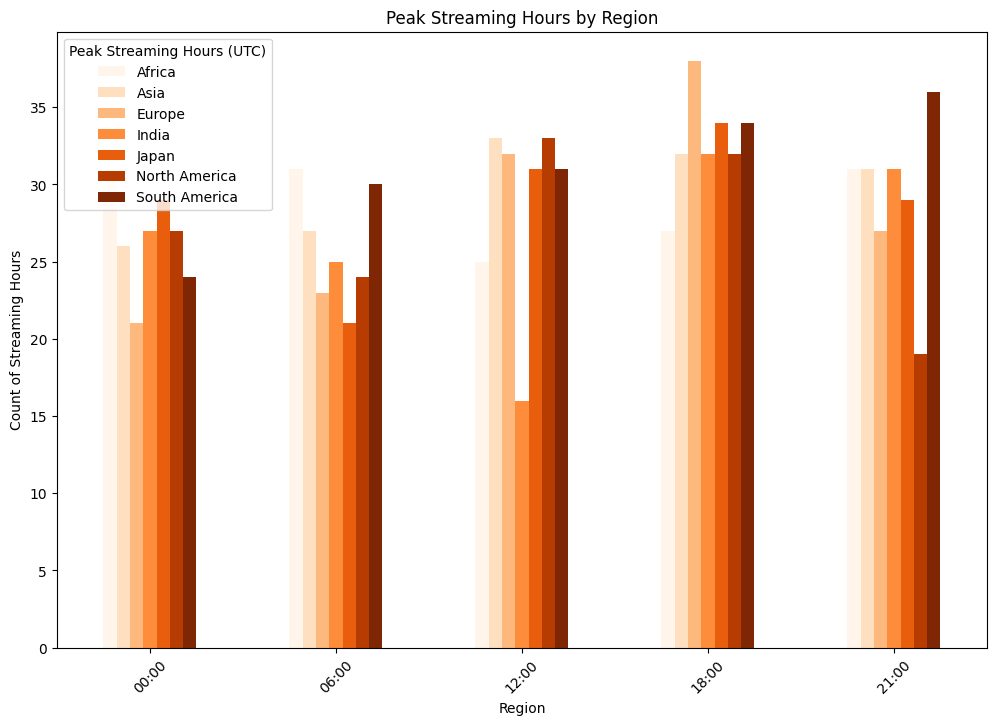

In [16]:
# finding Peak Streaming Hours and count occurrences

# Group by 'Peak Streaming Hours (UTC)' and 'Region', and count occurrences
peak_streaming_counts = dataset.groupby(['Peak Streaming Hours (UTC)', 'Region']).size().unstack()

# Plot a clustered bar chart
peak_streaming_counts.plot(kind="bar", figsize=(12, 8), colormap="Oranges")

# Set the title for the plot
plt.title("Peak Streaming Hours by Region")

# Label the y-axis
plt.ylabel("Count of Streaming Hours")

# Label the x-axis
plt.xlabel("Region")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with the title 'Peak Streaming Hours (UTC)'
plt.legend(title="Peak Streaming Hours (UTC)")

# Display the plot
plt.show()

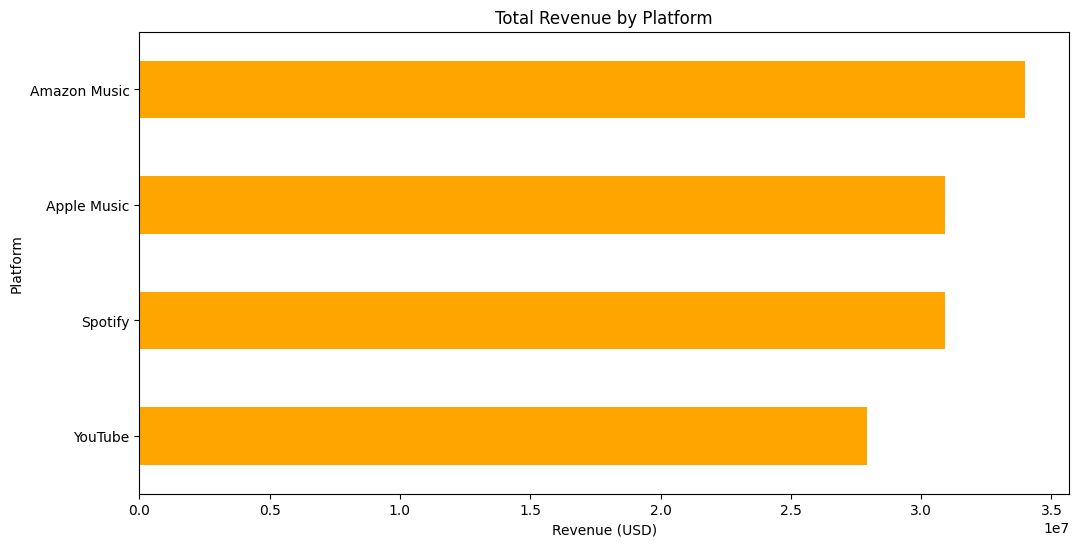

In [17]:
# platform vs revenue

# Group the dataset by 'Platform' and sum the 'Revenue (USD)' for each platform
platform_revenue = dataset.groupby("Platform")["Revenue (USD)"].sum().sort_values(ascending=True)

# Create a horizontal bar chart
# The bars are colored orange
platform_revenue.plot(kind="barh", figsize=(12, 6), color='orange')

# Set the title of the chart
plt.title("Total Revenue by Platform")

# Label the x-axis as 'Revenue (USD)'
plt.xlabel("Revenue (USD)")

# Label the y-axis as 'Platform'
plt.ylabel("Platform")

# Display the plot
plt.show()




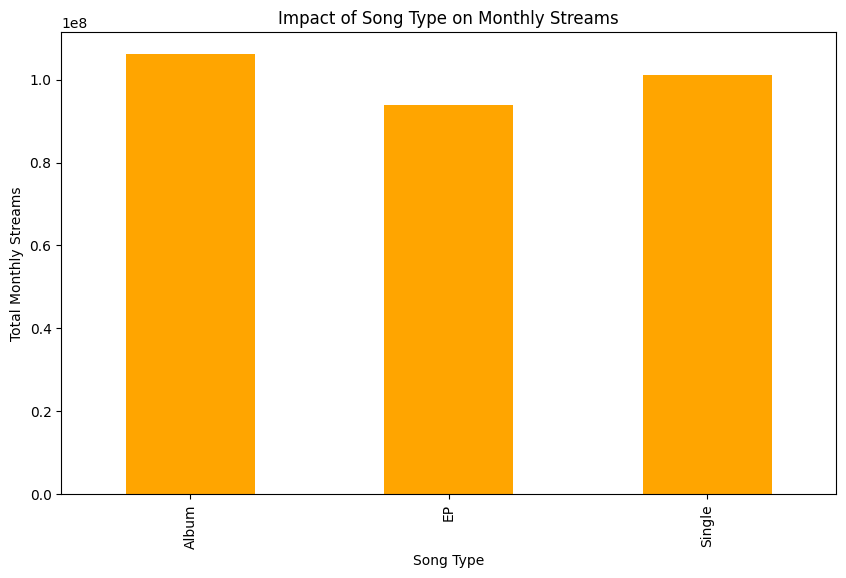

In [27]:
# Impact of Song Type on Streams
# Group the dataset by 'Song Type' and sum the 'Monthly Streams' for each song type
song_type_streams = dataset.groupby("Song Type")["Monthly Streams"].sum()

# Create a bar chart with the total monthly streams for each song type
# The bars are colored orange
song_type_streams.plot(kind="bar", figsize=(10, 6), color="orange")

# Set the title of the chart
plt.title("Impact of Song Type on Monthly Streams")

# Label the y-axis as 'Total Monthly Streams'
plt.ylabel("Total Monthly Streams")

# Label the x-axis as 'Song Type'
plt.xlabel("Song Type")

# Display the plot
plt.show()

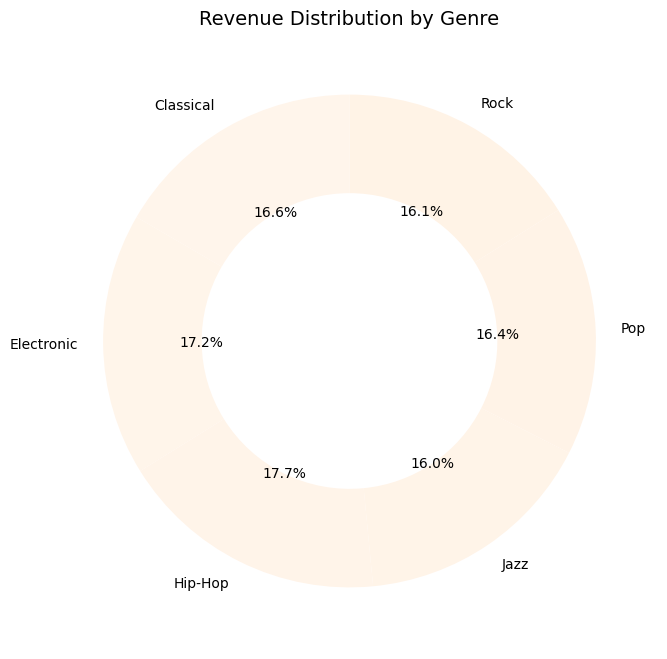

In [19]:
# Grouping by Genre and summing up the revenue
genre_revenue = dataset.groupby("Genre")["Revenue (USD)"].sum()

# Donut chart creation
plt.figure(figsize=(8, 8))
colors = plt.cm.Oranges(range(len(genre_revenue)))

# Pie chart with a hole to simulate a donut chart
plt.pie(genre_revenue, labels=genre_revenue.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})

# Adding the title
plt.title("Revenue Distribution by Genre", fontsize=14)

# Display the donut chart
plt.show()


## Conclusion: ##
### Upon analysis, Apple Music had a rollercoaster ride from 2019 to 2024, with a big jump in 2023 but a drop in 2024. Genre-wise, Jazz ruled in 2019, but by 2024, Hip-Hop was the clear favorite, bringing in the most revenue. The pandemic in 2020 likely caused the increase in revenue per user. Interestingly, both males and females showed equal interest in streaming music. When it comes to paid subscribers, India lags behind while Africa leads. Evening hours are the prime time for streaming in Europe. Amazon Music tops the revenue charts, while YouTube trails behind. People generally prefer albums over singles and EPs, with Hip-Hop generating the most revenue and Jazz at the bottom.
